In [ ]:
import sys
sys.path.append('/home/centos/leon/machine_learning_jupyter')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from utils.sklearn_util import polynomial_model, plot_learning_curve
%matplotlib inline

In [66]:
df_train_sample = pd.read_csv('/home/centos/leon/machine_learning_jupyter/dataset/jinnan_round1_train_20181227_preprocess.csv')
print(df_train_sample.shape)
df_train_sample.head()

(1396, 253)


,id,A1,A2,A3,A4,A6,A8,A10,A12,A13,...,B9-endB10-end,B9-start_B11-start,B9-endB11-start,B9-start_B11-end,B9-endB11-end,B10-start_B11-start,B10-endB11-start,B10-start_B11-end,B10-endB11-end,y
0,sample_1528,300,0.0,405.0,700,38.0,0.0,100,102,0.2,...,95400,0,0,0,0,0,0,0,0,0.879
1,sample_1698,300,0.0,405.0,700,29.0,0.0,101,103,0.2,...,91800,97200,91800,100800,95400,91800,86400,95400,90000,0.902
2,sample_639,300,0.0,405.0,700,29.0,0.0,102,103,0.2,...,91800,97200,91800,100800,95400,91800,86400,95400,90000,0.936
3,sample_483,300,0.0,405.0,700,38.0,0.0,100,102,0.2,...,95400,0,0,0,0,0,0,0,0,0.902
4,sample_617,300,0.0,405.0,700,29.0,0.0,101,103,0.2,...,91800,97200,91800,100800,95400,91800,86400,95400,90000,0.983


In [74]:
X = df_train_sample.iloc[:, 1:-1].values
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
y = df_train_sample.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('变量维度：{}'.format(X.shape))

变量维度：(1396, 251)


In [75]:
# 先试一下
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print('train mse: {}, test mse: {}'.format(mean_squared_error(y_train, rf.predict(X_train)), 
                                           mean_squared_error(y_test, rf.predict(X_test))))
print('train score: {}, test score: {}'.format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

train mse: 0.000113257677283, test mse: 0.00023857920618
train score: 0.884600341068, test score: 0.715120802023


###### 寻找最优参数

In [ ]:
param_grid = {'n_estimators': [10, 50, 100, 200, 500, 1000], 
              'max_depth': [None, 5, 10, 20], 
              'min_samples_split': [2, 4, 6, 8, 10]}
gs_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
gs_rf.fit(X, y)
print('best param: {}; best score: {}'.format(gs_rf.best_params_, gs_rf.best_score_))
# best param: {'min_samples_split': 8, 'n_estimators': 200, 'max_depth': 20}; best score: 0.684358309047

###### 学习曲线

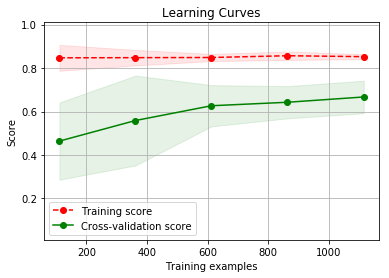

In [76]:
# 使用最优参数
rf2 = RandomForestRegressor(n_estimators=200, 
                            max_depth=20, 
                            min_samples_split=8)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(plt, rf2, 'Learning Curves', 
                    X, y, ylim=(0.01, 1.01), cv=cv)
plt.show()

#### 预测

In [59]:
df_test_sample = pd.read_csv('/home/centos/leon/machine_learning_jupyter/dataset/jinnan_round1_testA_20181227_preprocess.csv')
print(df_test_sample.shape)
df_test_sample.head()

(150, 252)


,id,A1,A2,A3,A4,A6,A8,A10,A12,A13,...,B9-start_B10-end,B9-endB10-end,B9-start_B11-start,B9-endB11-start,B9-start_B11-end,B9-endB11-end,B10-start_B11-start,B10-endB11-start,B10-start_B11-end,B10-endB11-end
0,sample_1656,300,0.0,405.0,700,29,0.0,101,103.0,0.2,...,97200,91800,97200,91800,100800,95400,91800,86400,95400,90000
1,sample_1548,300,0.0,405.0,700,39,80.0,100,102.0,0.2,...,99000,95400,0,0,0,0,0,0,0,0
2,sample_769,300,0.0,405.0,700,80,0.0,102,104.0,0.2,...,0,0,0,0,0,0,0,0,0,0
3,sample_1881,300,0.0,405.0,700,29,0.0,102,103.0,0.2,...,97200,91800,97200,91800,100800,95400,91800,86400,95400,90000
4,sample_1807,300,0.0,405.0,700,30,0.0,101,104.0,0.2,...,97200,91800,97200,91800,100800,95400,91800,86400,95400,90000


In [78]:
rf_best = RandomForestRegressor(n_estimators=200, 
                                max_depth=20, 
                                min_samples_split=8)
rf_best.fit(X, y)
out_y = rf_best.predict(scaler.transform(df_test_sample.iloc[:, 1:].values))

In [89]:
df_submit = pd.DataFrame(data={'id': df_test_sample['id'].values.tolist(), 'y': [round(y, 3) for y in out_y.tolist()]}, 
                         columns=['id', 'y'])
print(df_submit.shape)
df_submit.head()

(150, 2)


,id,y
0,sample_1656,0.918
1,sample_1548,0.878
2,sample_769,0.937
3,sample_1881,0.913
4,sample_1807,0.913


In [90]:
df_submit.to_csv('/home/centos/leon/machine_learning_jupyter/dataset/jinnan_round1_testA_20181227_submit_20190106.csv', 
                 index=False, header=False)